# Exercise 5.11: 

Suppose a plane wave of wavelength $\lambda$, such as light or a sound wave, is blocked by an object with a straight edge.

This wave will be diffracted at the edge and the resulting intensity at the position $(x,z)$ is given by near-field diffraction theory to be 

$$I = \frac{I_0}{8}\bigg([2C(u)+1]^2 +[2S(u)+1]^2\bigg),$$

where $I_0$ is the intensity of the wave before diffraction and 

$$ u = x \sqrt{\frac{2}{\lambda z}}, \quad C(i) = \int^u_0 cos\frac{1}{2}\pi t^2 \text{d}t, \quad S(u) = \int^u_0sin\frac{1}{2}\pi t^2 \text{d}t$$



Write a program to calculate $I/I_0$ and make a plot of it as a function of $x$ in the range -5m to 5m for the case of a sound wave with wavelength $\lambda = 1$m, measured $z=3$m past the straight edge. Calculate the integrals using Gaussain quadrature with $n=50$ points. You shuold find the signifcant variation in the inensity of the diffracted sound - enough that you could easily hear the effect if sound were diffracted, say, at the edge of a tall building.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from gaussxw import gaussxwab

In [2]:
def gauss_quad(f, a, b, N):
    
    x, w = gaussxwab(N, a, b)
    I = 0
    for k in range(N):
        I += w[k]*f(x[k])
    return I

In [8]:
def u(x, z, l):
    return x*np.sqrt(2/(l*z))

In [9]:
def c(t):
    return np.cos(np.pi/2 * t**2)

In [10]:
def s(t):
    return np.sin(np.pi/2 * t**2)

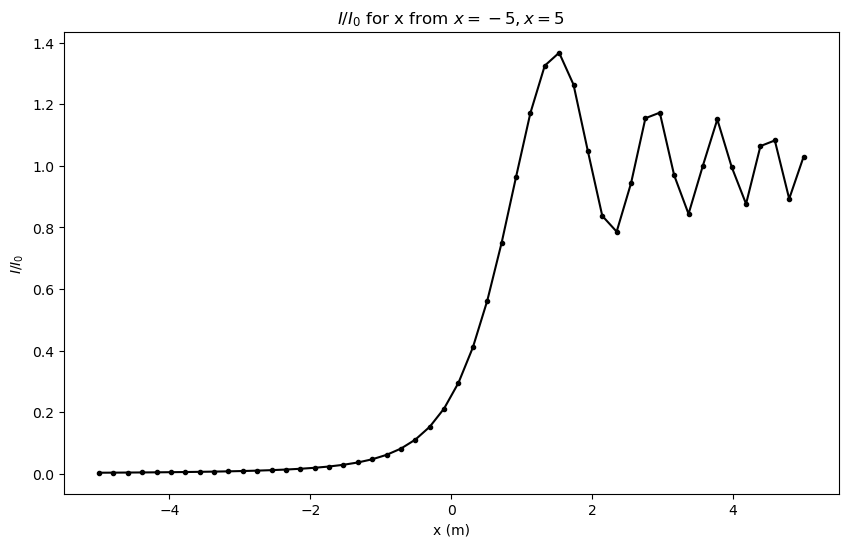

In [15]:
l = 1 # meter
z = 3 # meter
N = 50 # points for the gaussian quadrature

x_range = np.linspace(-5, 5, N) # x varies from -5 to 5
start = 0
I_ratios = []


for x in x_range:
    
    u_val = u(x, z, l)
    C = gauss_quad(c, start, u_val , N)
    S = gauss_quad(s, start, u_val, N)
    I_ratio = ((2*C+1)**2+(2*S+1)**2)/8
    I_ratios.append(I_ratio)

plt.figure(figsize=(10,6))
plt.title("$I/I_0$ for x from $x=-5, x=5$")
plt.xlabel("x (m)")
plt.ylabel("$I/I_0$")
plt.plot(x_range, I_ratios, 'k.-')
plt.show()